# IERG 3320 Social Media and Human Information Interaction
## Project 2 : Sentiment Analysis
Write a Python program to perform sentiment analysis
on each of the documents using the dictionary-based approach.

# New Section

In [0]:
!pip install wordcloud

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from string import punctuation as punc
from nltk import word_tokenize as token
from nltk.corpus import stopwords
%matplotlib inline

In [0]:
def load_data():
    with open('pos.txt',encoding='utf-8',errors='ignore') as f1,\
    open ('neg.txt',encoding='utf-8',errors='ignore') as f2:
        pos = [line.rstrip('\n') for line in f1]
        neg = [line.rstrip('\n') for line in f2]
    return pos, neg

def optimize(doc):
    """
    first of all, filter out duplicated words, then optimize the comment in
    3 english writing aspects:
    a. remove stop word, eg it's, ourselves, aren, you're
    b. remove all punctuation, eg , ! ? # @ [ ]
    c. make sure all words in lowercase, eg Like -> like
    """
    words = set(token(doc))
    stop_words = set(stopwords.words('english'))
    new_words = [word.lower() for word in words if word not in punc
            and word not in stop_words]
    return new_words

def analysis(doc):
    """
    this function help perform binary sentiment analysis on each
    comment and return value counts on postive/negative words
    """
    current_pos, current_neg = 0, 0
    for word in doc:
        if word in pos:
            current_pos += 1
            pos_words.append(word)
        if word in neg:
            current_neg += 1
            neg_words.append(word)

    """ testing code:
        if current_pos > current_neg:
            print('this comment is postive!')
        elif    current_pos < current_neg:
            print('this comment is negative!')
        else:
            print('this comment can\'t be classified')
    """
    return current_pos, current_neg

def wordcloud(text, image):
    mask = np.array(Image.open(image))
    wordcloud = WordCloud(max_font_size=70, max_words=100,
                            mask = mask,
                            background_color= 'white',
                            contour_width=2, contour_color='deepskyblue')
    wordcloud.generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [0]:
  # change txt file path for each student
  file = '1155062170.txt'

  # store postive/ negative corpus
  pos, neg = load_data()
  pos_count, neg_count = 0, 0
  document = '' # store all words from one student
  pos_words, neg_words = [], [] # store postive, negative word list
  with open(file,encoding='utf-8',errors='ignore') as f:
      for line in f:
          # read in each comment line by line
          comment = line.strip()
          # save comment into string
          document += comment
          # optimize words and perform text analysis
          doc = optimize(comment)
          v1, v2 = analysis(doc)
          pos_count += v1
          neg_count += v2
      print("Total positive / negative words are %d and %d"%(pos_count,neg_count))


Total positive / negative words are 40 and 14


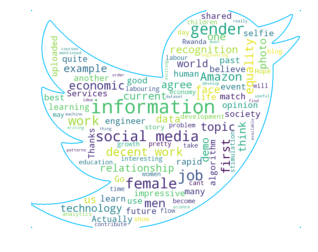

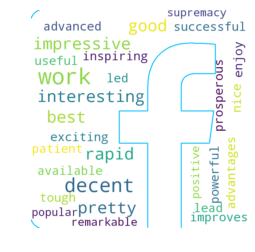

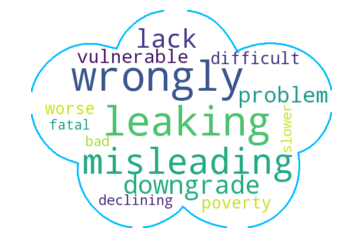

In [0]:
  # Data Visualization: generate wordcloud
  wordcloud(document, 'twitter_mask.png')
  wordcloud(' '.join(pos_words), 'fbmask.png')
  wordcloud(' '.join(neg_words), 'mask-cloud.png')